# Notebook 0: Quick start, plotting with Galapago in a nutshell

In this notebook you can find an example of how to fill a simple histogram and then plot it with the Galapago modules. This is usually done in two separate steps with ```fillPlots.py``` script for the filling step, and with the ```harvesting_*.py``` scripts for the harvesting step.

## 0.0 - Setting the environment

We first move our location to the parent directory to import every thing we need

In [2]:
import os

if 'notebooks' in os.getcwd():
    os.chdir('..')

In [3]:
import ROOT as r
from   ROOT import gROOT, TCanvas, TFile, TGraphErrors, SetOwnership
import math, sys, optparse, array, copy
import gc, inspect, __main__
import numpy as np
import time

import include.Sample as Sample
import include.Launcher as Launcher
import include.helper as helper
import include.Canvas as Canvas
import include.CutManager as CutManager


We also set the TDR style in the plots we will make by loading the tdrstyle cpp macro:

In [3]:
r.gROOT.LoadMacro('include/tdrstyle.C+')
r.gROOT.SetBatch(1)
r.setTDRStyle()

## 0.1 - Filling step

We select the .dat file where the samples and their location (together with xsection, colors... etc) are specified, in this case ```dat/Samples_cern_fillingv2.dat```.

In order to select which samples are going to fill the histograms, we need to create a list containing the names to be given later as an input. In this example, we will only loop over the events of one of the H->XX mass points: mH = 1000 GeV, mX = 150 GeV, ctau = 100 mm. The name of this sample is refered in the .dat file as ```'HXX_1000_150_100mm'```

We choose the integrated luminosity which we want to wieght the events to.

In [4]:
filename = 'dat/Samples_cern_fillingv2.dat' # .dat file

Signals = [] # sample list
Signals.append('HXX_1000_150_100mm')

lumi = 35.87 # integrated luminosity

The samples are handled with instances of the python ```Tree``` class, defined in ```include/Sample.py```. This class reads a certain .dat file, the list with the selected samples, and manages the information.

<strong>Note</strong>: the ```name``` of the Tree instance is an identifier. ```isdata``` needs to be set to ```False``` in case of Monte Carlo samples in order to apply the appropriate weighting of the histograms.

In [6]:
treeSI = Sample.Tree( fileName = helper.selectSamples(filename, Signals, 'SI'), name = 'SI', isdata = 0 )

selectSamples for  SI : List Of Samples: ['HXX_1000_150_100mm']
---> Found a match for HXX_1000_150_100mm : HXX_1000_150_100mm   HXX(1000,150,100) /eos/user/f/fernance/LLP_Analysis/NTuples/2016_v3/HXX_1000_150_100mm/ 0.7739 , matchesName_= True , matchesRegExp True


The filled histograms will be writen in a ```.root``` file in the specified directory. In this example, the output files are stored in the ```output_histograms/``` dir, which is created first.

The ```Tree.Loop()``` function loops over the samples selected when declaring the Tree and fills a set of predefined histograms. The output directory ```output_histograms/``` is given as a parameter, as well as the luminosity to apply the weighting.

<strong>Note:</strong> The set of histograms that are filled are declared in the ```include/processHandler.py``` file.

<em>(This step takes ~5 minutes to run for this sample)</em>

In [7]:
if not os.path.exists('output_histograms/'): os.makedirs('output_histograms/')

In [8]:
treeSI.Loop(lumi, 'output_histograms/')

Reading samples: HXX_1000_150_100mm


Once it finishes when can check that the ```.root``` file is correctly stored in ```output_histograms/```.

The ```Loop()``` function creates 1 ```.root``` file per ```.root``` file associated to each sample.

In [9]:
!ls -l output_histograms/

total 232
-rw-r--r--. 1 fernance 1399 237380 Dec 23 17:50 SI__HXX_1000_150_100mm__HXX_1000_150_100mm__0.root


## 0.2 - Harvesting step

Once files containing the histograms are stored we can get the ```TH1F``` objects by using the ```Tree.getLoopTH1F()``` and ```Tree.getLoopStacked()``` functions.

1) ```getLoopTH1F()```: Will return a histogram by adding all the histograms (even stored in different files) relative to the samples speficied in the Tree instance.

2) ```getLoopStack()```: Will return a stacked histogram by adding all the histograms (even stored in different files) in a block structure as specified in the ```.dat``` file.

This two functions require the dir containing the histograms (```'output_histograms/'```) and the key name of the histogram itself (that should be the same for every sample in every ```.root``` file).

In this example, we plot the mass of the MM candidates in the ```SROS``` region (check the ```include/processHandler.py``` file for the region definition), refered as ```hMMSROS_mass```.

<em>(The full name of the histogram in every root file also included the sample, the block, and the original name of the tree: ```hMMSROS__SI__HXX_1000_150_100mm__HXX_1000_150_100mm__0```.)</em>

In [34]:
histogram = treeSI.getLoopTH1F('output_histograms', 'hMMSROS_mass') # The TH1F

The style of the histogram is tuned manually:

In [41]:
histogram.SetMarkerStyle(20)
histogram.SetMarkerSize(0.8)
histogram.SetMarkerColor(r.kBlack)
histogram.SetMaximum(100.0)
histogram.SetMinimum(1e-5)

The histogram is plot by using the ```Canvas``` class. The same of the plot, format and legend parameters are specified when declaring the ```Canvas``` instance. 

The tuned ```TH1F``` is added with the ```Canvas.addHisto()``` function, specifying the style, label, legend style, color, and the order. 

The image is created with the ```Canvas.save()``` function where the y-axis scale could be also specified. The ``` outputDir``` is the output directory where the png/pdf file will be stored.

In [42]:
plot = Canvas.Canvas('Histogram_hMMSROS_mass', 'png', 0.15, 0.79, 0.4, 0.87, 1)
plot.addHisto(histogram, 'P', 'H#rightarrowXX: m_{H} = 1000 GeV, m_{X} = 150 GeV, c#tau = 100 mm', 'p', '', 1, 0)
plot.save(1, 0, 1, lumi, '', outputDir = 'output_plot/')

Info in <TCanvas::Print>: png file output_plot/Histogram_hMMSROS_mass.png has been created


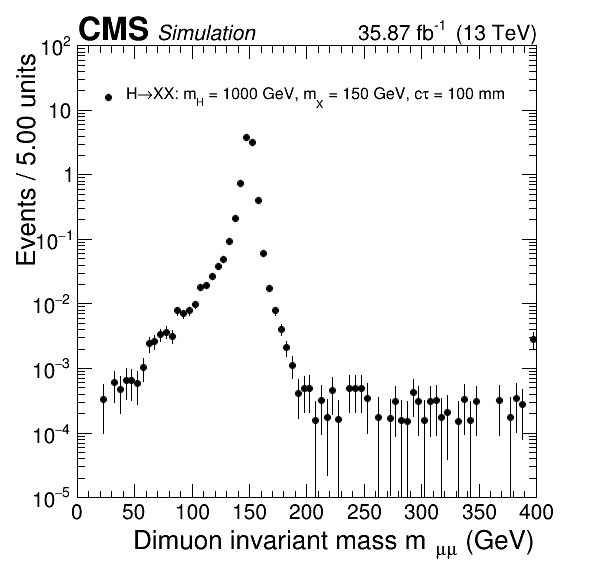

In [43]:
from IPython.display import Image
Image(filename='output_plot/Histogram_hMMSROS_mass.png') 